# Lab 4

## Import Libs and connect to db

In [3]:
import pandas
import configparser
import psycopg2

In [4]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [5]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db
                       )

In [6]:
cur=conn.cursor()

## 1st Question

In [7]:
sql_q1 = """
            select * from gp2.student
            """

In [8]:
df = pandas.read_sql_query(sql_q1,conn)

df[:]

,student_email,stu_name,major
0,mcdaniva@dukes.jmu.edu,Virginia McDaniel,IA
1,student2@dukes.jmu.edu,Student2,GEOG
2,student3@dukes.jmu.edu,Student3,ISAT
3,student4@dukes.jmu.edu,Student4,POSC
4,s5@jmu.edu,s5,GS


## Question 2

In [9]:
sql_q2 = """
        select gp2.professor.prof_name,
        gp2.course.course_name
        from gp2.professor
        inner join gp2.course
        on gp2.professor.prof_email = gp2.course.prof_email
        
        """

In [10]:
df = pandas.read_sql_query(sql_q2,conn)

df[:]

,prof_name,course_name
0,Xuebin Wei,Data Mining
1,Zachary Bortolot,Earth Observation
2,Noel Hendrickson,Counterfactual Reasoning
3,Edmund Pevensie,Strategic Diplomacy
4,Ronald Raab,Selected Topics in IA


## Question 3

In [11]:
sql_q3 = """
        select course_num, count(student_email) as enrolled
        from gp2.enrollment_list
        group by course_num
        order by enrolled desc
        
        """

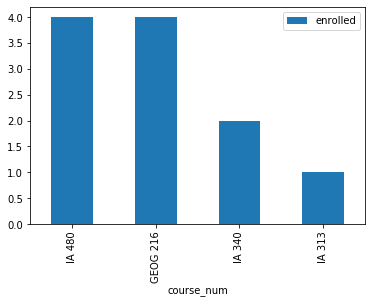

In [13]:
df = pandas.read_sql_query(sql_q3,conn)

df.plot.bar(y= 'enrolled', x='course_num')

## Question 4

In [14]:
sql_q4 = """
        select gp2.professor.prof_name,
        count(gp2.course.course_name) as teach_number
        from gp2.professor
        inner join gp2.course
        on gp2.professor.prof_email = gp2.course.prof_email
        group by professor.prof_name
        order by teach_number desc
        """

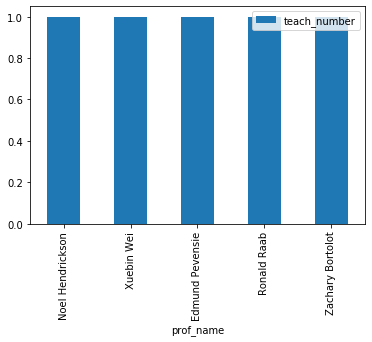

In [16]:
df = pandas.read_sql_query(sql_q4,conn)

df.plot.bar(y= 'teach_number', x='prof_name')

## Question 5

In [17]:
sql_q5_professor = """
                    insert into gp2.professor(prof_email,prof_name,office)
            values('{}','{}','{}')
            """.format('Jacksopx@dukes.jmu.edu','Percy Jackson','ISAT210')

In [18]:
cur.execute(sql_q5_professor)

In [19]:
conn.commit()

In [20]:
df = pandas.read_sql_query('select * from professor',conn)
df[:]

,prof_email,prof_name,office
0,weixx@jmu.edu,Xuebin Wei,hhs112
1,bortolzj@jmu.edu,Zachary Bortolot,none
2,hendrinx@jmu.edu,Noel Hendrickson,none
3,Pevensex@jmu.edu,Edmund Pevensie,none
4,raabrw@jmu.edu,Ronald Raab,none
5,Jacksopx@dukes.jmu.edu,Percy Jackson,ISAT210


In [23]:
sql_q5_course = """
                    insert into gp2.course(course_num,course_name,room_num,prof_email)
            values('{}','{}','{}','{}')
            """.format('BIO','Marine Biology','ISAT310','Jacksopx@dukes.jmu.edu')

In [24]:
cur.execute(sql_q5_course)

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [25]:
sql_q5_course = """
                    insert into gp2.course(course_num,course_name,room_num,prof_email)
            values('{}','{}','{}','{}')
            """.format('BIO','Marine Biology','ISAT310','Jacksopx@dukes.jmu.edu')

In [26]:
cur.execute(sql_q5_course)

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [27]:
Rollback;

NameError: name 'Rollback' is not defined

In [30]:
sql_q5_course = """
            insert into gp2.course(course_num,course_name,room_num,prof_email)
            values('{}','{}','{}','{}')
            """.format('BIO','Marine Biology','ISAT310','Jacksopx@dukes.jmu.edu')

In [31]:
cur.execute(sql_q5_course)

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [32]:
cur.execute('ROLLBACK')

In [36]:
sql_q5_course = """
            insert into gp2.course(course_num,course_name,room_num,prof_email)
            values('{}','{}','{}','{}')
            """.format('BIO 340','Marine Biology','ISAT310','Jacksopx@dukes.jmu.edu')

In [37]:
cur.execute(sql_q5_course)

In [38]:
df = pandas.read_sql_query('select * from gp2.course',conn)
df[:]

,course_num,course_name,room_num,prof_email
0,IA 340,Data Mining,Online,weixx@jmu.edu
1,GEOG 216,Earth Observation,EnGeo1302,bortolzj@jmu.edu
2,IA 313,Counterfactual Reasoning,ISAT/CS148,hendrinx@jmu.edu
3,POSC 379,Strategic Diplomacy,Miller001,Pevensex@jmu.edu
4,IA 480,Selected Topics in IA,ISAT/CS159,raabrw@jmu.edu
5,BIO,Marine Biology,ISAT310,Jacksopx@dukes.jmu.edu
6,BIO 340,Marine Biology,ISAT310,Jacksopx@dukes.jmu.edu


## Question 6

In [39]:
sql_q6_course = """
                update gp2.course
                set prof_email = '{}'
                where prof_email = '{}'
                """.format('Jacksonopx@dukes.jmu.edu','Pevensex@jmu.edu')

In [40]:
cur.execute(sql_q6_course)

IntegrityError: insert or update on table "course" violates foreign key constraint "course_prof_email_fkey"
DETAIL:  Key (prof_email)=(Jacksonopx@dukes.jmu.edu) is not present in table "professor".


In [41]:
sql_q6_course = """
                update gp2.course
                set prof_email = '{}'
                where prof_email = '{}'
                """.format('new_p@jmu.edu','Pevensex@jmu.edu')

In [42]:
cur.execute(sql_q6_course)

IntegrityError: insert or update on table "course" violates foreign key constraint "course_prof_email_fkey"
DETAIL:  Key (prof_email)=(new_p@jmu.edu) is not present in table "professor".


In [43]:
sql_q6_course = """
                update gp2.course
                set prof_email = '{}'
                where prof_email = '{}'
                """.format('Jacksopx@dukes.jmu.edu','Pevensex@jmu.edu')

In [44]:
cur.execute(sql_q6_course)

In [45]:
conn.commit()

In [46]:
df = pandas.read_sql_query('select * from gp2.course',conn)
df[:]

,course_num,course_name,room_num,prof_email
0,IA 340,Data Mining,Online,weixx@jmu.edu
1,GEOG 216,Earth Observation,EnGeo1302,bortolzj@jmu.edu
2,IA 313,Counterfactual Reasoning,ISAT/CS148,hendrinx@jmu.edu
3,IA 480,Selected Topics in IA,ISAT/CS159,raabrw@jmu.edu
4,BIO,Marine Biology,ISAT310,Jacksopx@dukes.jmu.edu
5,BIO 340,Marine Biology,ISAT310,Jacksopx@dukes.jmu.edu
6,POSC 379,Strategic Diplomacy,Miller001,Jacksopx@dukes.jmu.edu


In [47]:
sql_q6_professor = """
                    delete from gp2.professor
                    where prof_email = '{}'
                    """.format('Pevensex@jmu.edu')

In [48]:
cur.execute(sql_q6_professor)

In [49]:
conn.commit()

In [50]:
df = pandas.read_sql_query('select * from gp2.professor',conn)
df[:]

,prof_email,prof_name,office
0,weixx@jmu.edu,Xuebin Wei,hhs112
1,bortolzj@jmu.edu,Zachary Bortolot,none
2,hendrinx@jmu.edu,Noel Hendrickson,none
3,raabrw@jmu.edu,Ronald Raab,none
4,Jacksopx@dukes.jmu.edu,Percy Jackson,ISAT210


## close connection

In [51]:
cur.close()
conn.close()